In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
# 查看数值字段的分布情况
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
data["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [68]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
# inplace 表示是否在当前变量上修改，默认 False 表示返回新的变量
data.drop(["Cabin", "Name", "Ticket"], inplace=True, axis=1)



In [69]:
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法

data["Age"] = data["Age"].fillna(data["Age"].mean())

# 等价操作就地填充
# data["Age"].fillna(data["Age"].mean(), inplace=True)

In [70]:
#将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
data["Sex"] = (data["Sex"] == "male").astype("int")

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [71]:
X = data.loc[:, data.columns != "Survived"]
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [72]:
y = data.loc[:, data.columns == "Survived"]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [73]:
# 使用模型开始
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,1,45.5,0,0,28.5000,0
733,734,2,1,23.0,0,0,13.0000,0
382,383,3,1,32.0,0,0,7.9250,0
704,705,3,1,26.0,1,0,7.8542,0
813,814,3,0,6.0,4,2,31.2750,0


In [75]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(X_train, y_train)

score_ = clf.score(X_test, y_test)
score_

0.7486033519553073

In [76]:
score = cross_val_score(clf, X, y, cv=10).mean()

score

0.7464294631710362

0.8156424581005587


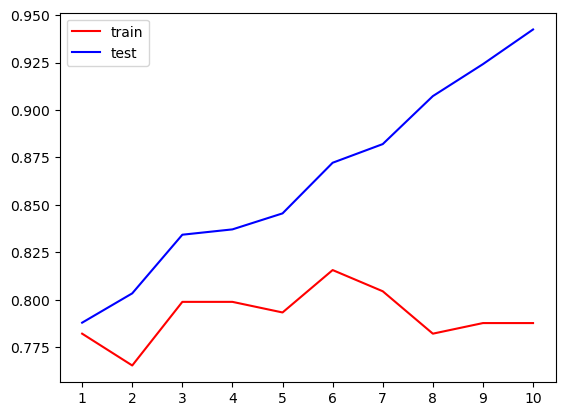

In [77]:
# 搜索剪枝策略
test_score = []
train_score = []

for i in range(1, 11):
    clf = DecisionTreeClassifier(
        random_state=42
        , max_depth=i
        , criterion="entropy"
    )
    clf = clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

print(max(test_score))
plt.plot(range(1, 11), test_score, color="red", label="train")
plt.plot(range(1, 11), train_score, color="blue", label="test")
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [85]:
#
import numpy as np

gini_thresholds = np.linspace(0, 0.5, 20)

parameters = {
    "splitter": ("best", "random")
    , "criterion": ("gini", "entropy")
    , "max_depth": [*range(1, 10)]
    , 'min_samples_leaf': [*range(1, 50, 5)]
    , 'min_impurity_decrease': [*np.linspace(0, 0.5, 20)]
    # , "random_state":[*range(0, 50, 5)]
}

clf = DecisionTreeClassifier(random_state=5)
GS = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
                                                   0.3157894736842105,
                                                   0.3421052631578947,
                                                   0.3684210526315789,
                                                   0.39473684210526316,
                                                   0.42105263157894735,
                                                   0.4473684210526315,
                                                   0.47368421052631576, 0.5],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [86]:
GS.best_score_

0.8357003129890452

In [87]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'splitter': 'random'}